# Exploratory Notebook for Aviation Project, Group 4

In [295]:
#Bring in packages for analysis.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [296]:
df = pd.read_csv("data/AviationData.csv", encoding='ISO-8859-1', low_memory=False)

In [297]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [298]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [300]:
#This is not especially  helpful. It seemed more efficient than looking at each var 1 by 1, but it's too much info to weed through all together.
for v in df.columns:
    print(df[v].value_counts())

20001214X45071    3
20001212X19172    3
20001213X29445    2
20060427X00489    2
20001213X32142    2
                 ..
20130909X11748    1
20001212X19118    1
20001214X36122    1
20020917X04496    1
20001213X28550    1
Name: Event.Id, Length: 87951, dtype: int64
Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64
ERA22FA318    2
WPR22FA309    2
WPR22LA143    2
ERA22LA379    2
DCA22WA172    2
             ..
ERA22LA045    1
CHI99LA297    1
LAX83FA038    1
CEN09CA408    1
FTW04LA229    1
Name: Accident.Number, Length: 88863, dtype: int64
1982-05-16    25
2000-07-08    25
1984-06-30    25
1983-08-05    24
1984-08-25    24
              ..
2022-01-26     1
1992-01-17     1
2014-07-15     1
2022-11-16     1
2020-04-08     1
Name: Event.Date, Length: 14782, dtype: int64
ANCHORAGE, AK                   434
MIAMI, FL                       200
ALBUQUERQUE, NM                 196
HOUSTON, TX                     193
CHICAGO, IL                     184
                     

In [301]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [302]:
df['Event.Year'] = pd.DatetimeIndex(df['Event.Date']).year

In [254]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022


In [303]:
df = df[df['Event.Year'] >= 2000]

In [256]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year
47675,20001212X20407,Accident,MIA00LA063,2000-01-01,"HOMESTEAD, FL",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,3.0,VMC,Cruise,Probable Cause,29-11-2000,2000
47676,20001212X20327,Accident,ATL00FA019,2000-01-01,"MONTEAGLE, TN",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,19-04-2001,2000
47677,20001212X20383,Accident,LAX00LA063,2000-01-02,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,04-12-2000,2000
47678,20001212X20382,Accident,LAX00LA062,2000-01-02,"DOS PALOS, CA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,0.0,VMC,Cruise,Probable Cause,14-12-2001,2000
47679,20001212X20364,Accident,FTW00LA067,2000-01-02,"CORNING, AR",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,5.0,VMC,Cruise,Probable Cause,02-03-2001,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022


In [306]:
df = df.drop(columns=['Latitude', 'Longitude', 'Report.Status', 'Country', 'Airport.Code', 
                'Airport.Name', 'Registration.Number', 'Number.of.Engines', 'Engine.Type',
                'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight',
                'Report.Status', 'Publication.Date', 'Location']) 
df.drop(df.index[df["Aircraft.Category"] != "Airplane"], inplace=True)

KeyError: "['Latitude' 'Longitude' 'Report.Status' 'Country' 'Airport.Code'\n 'Airport.Name' 'Registration.Number' 'Number.of.Engines' 'Engine.Type'\n 'FAR.Description' 'Schedule' 'Air.carrier' 'Broad.phase.of.flight'\n 'Report.Status' 'Publication.Date' 'Location'] not found in axis"

In [307]:
df['Make'].value_counts()

CESSNA                4867
PIPER                 2805
Cessna                2225
Piper                 1148
BOEING                1037
                      ... 
MAARTEN H VERSTEEG       1
NORTON CLAUDE C          1
GMK VENTURES LLC         1
Liberty                  1
SUPERIOR                 1
Name: Make, Length: 3738, dtype: int64

In [344]:
df["Make"] = df["Make"].replace ("Air tractor inc", "Air tractor")
df["Make"] = df["Make"].replace ("Air tractor inc.", "Air tractor")
df["Make"] = df["Make"].replace ("Airbus industrie", "Airbus")
df["Make"] = df["Make"].replace ("American aviation", "American")
df["Make"] = df["Make"].replace ("American aviation corp. (aac)", "American")
df["Make"] = df["Make"].replace ("American champion (acac)", "American champion")
df["Make"] = df["Make"].replace ("American champion aircraft)", "American champion")
df["Make"] = df["Make"].replace ("American legend aircraft co", "American legend")
df["Make"] = df["Make"].replace ("Aviat aircraft inc", "Aviat")
df["Make"] = df["Make"].replace ("Aviat inc", "Aviat")
df["Make"] = df["Make"].replace ("Ayres corporation", "Ayres")
df["Make"] = df["Make"].replace ("Boeing stearman", "Boeing")
df["Make"] = df["Make"].replace ("Boeing company", "Boeing")
df["Make"] = df["Make"].replace ("The boeing company", "Boeing")
df["Make"] = df["Make"].replace ("Bombardier, inc.", "Bombardier")
df["Make"] = df["Make"].replace ("Bombardier inc", "Bombardier")
df["Make"] = df["Make"].replace ("Britten-norman", "Britten norman")
df["Make"] = df["Make"].replace ("Cessna aircraft", "Cessna")
df["Make"] = df["Make"].replace ("Cessna aircraft co", "Cessna")
df["Make"] = df["Make"].replace ("Cessna aircraft company", "Cessna")
df["Make"] = df["Make"].replace ("Christen industries inc", "Christen industries")
df["Make"] = df["Make"].replace ("Cirrus design corp.", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design corp", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design corporation", "Cirrus")
df["Make"] = df["Make"].replace ("Cub crafters", "Cubcrafters")
df["Make"] = df["Make"].replace ("Cub crafters inc", "Cubcrafters")
df["Make"] = df["Make"].replace ("Cubcrafters inc", "Cubcrafters")
df["Make"] = df["Make"].replace ("Dassault-breguet", "Dassault")
df["Make"] = df["Make"].replace ("De havilland", "Dehavilland")
df["Make"] = df["Make"].replace ("Diamond aircraft ind gmbh", "Diamond")
df["Make"] = df["Make"].replace ("Diamond aircraft ind inc", "Diamond")
df["Make"] = df["Make"].replace ("Diamond aircraft industries", "Diamond")
df["Make"] = df["Make"].replace ("Embraer-empresa brasileira de", "Embraer")
df["Make"] = df["Make"].replace ("Embraer s a", "Embraer")
df["Make"] = df["Make"].replace ("Ercoupe (eng & research corp.)", "Ercoupe")
df["Make"] = df["Make"].replace ("Flight design gmbh", "Flight design")
df["Make"] = df["Make"].replace ("Gates learjet corp.", "Gates lear jet")
df["Make"] = df["Make"].replace ("Grumman american", "Grumman")
df["Make"] = df["Make"].replace ("Grumman acft eng cor-schweizer", "Grumman")
df["Make"] = df["Make"].replace ("Grumman american avn. corp.", "Grumman")
df["Make"] = df["Make"].replace ("Grumman-schweizer", "Grumman")
df["Make"] = df["Make"].replace ("Gulfstream-schweizer a/c corp", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream-schweizer", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream american corp", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream aerospace", "Gulfstream")
df["Make"] = df["Make"].replace ("Hawker beechcraft", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corp", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corp.", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corporation", "Hawker")
df["Make"] = df["Make"].replace ("Hawker siddeley", "Hawker")
df["Make"] = df["Make"].replace ("Jabiru usa sport aircraft llc", "Jabiru")
df["Make"] = df["Make"].replace ("Lancair company", "Lancair")
df["Make"] = df["Make"].replace ("Learjet inc", "Learjet")
df["Make"] = df["Make"].replace ("Liberty aerospace incorporated", "Liberty aerospace inc.")
df["Make"] = df["Make"].replace ("Mcdonnell douglas aircraft co", "Mcdonnell douglas")
df["Make"] = df["Make"].replace ("Douglas", "Mcdonnell douglas")
df["Make"] = df["Make"].replace ("Lancair company", "Lancair")
df["Make"] = df["Make"].replace ("Mooney aircraft corp.", "Mooney")
df["Make"] = df["Make"].replace ("Mooney airplane co inc", "Mooney")
df["Make"] = df["Make"].replace ("Nanchang china", "Nanchang")
df["Make"] = df["Make"].replace ("Pilatus aircraft ltd", "Pilatus")
df["Make"] = df["Make"].replace ("Piper aircraft inc", "Piper")
df["Make"] = df["Make"].replace ("Piper aircraft corporation", "Piper")
df["Make"] = df["Make"].replace ("Piper aircraft", "Piper")
df["Make"] = df["Make"].replace ("Piper/cub crafters", "Piper")
df["Make"] = df["Make"].replace ("Quest aircraft company llc", "Quest")
df["Make"] = df["Make"].replace ("Raytheon aircraft company", "Raytheon")
df["Make"] = df["Make"].replace ("Raytheon corporate jets", "Raytheon")
df["Make"] = df["Make"].replace ("Remos acft gmbh flugzeugbau", "Remos aircraft gmbh")
df["Make"] = df["Make"].replace ("Rockwell international", "Rockwell")
df["Make"] = df["Make"].replace ("Ryan aeronautical", "Ryan")
df["Make"] = df["Make"].replace ("Schweizer aircraft corp", "Schweizer")
df["Make"] = df["Make"].replace ("Stearman aircraft", "Stearman")
df["Make"] = df["Make"].replace ("Taylorcraft aviation corp", "Taylorcraft")
df["Make"] = df["Make"].replace ("Thrush aircraft inc", "Thrush")
df["Make"] = df["Make"].replace ("Vans aircraft inc", "Vans")
df["Make"] = df["Make"].replace ("Waco classic aircraft", "Waco")
df["Make"] = df["Make"].replace ("Weatherly aviation co inc", "Weatherly")

In [345]:
df["Commercial"] = "No"
df.loc[df["Make"].isin(["Boeing", "Airbus"]), "Commercial"] = "Yes"

In [340]:
df["Fatal"] = pd.notna(df["Total.Fatal.Injuries"]).astype(int)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24164 entries, 47682 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                24164 non-null  object 
 1   Investigation.Type      24164 non-null  object 
 2   Accident.Number         24164 non-null  object 
 3   Event.Date              24164 non-null  object 
 4   Injury.Severity         23350 non-null  object 
 5   Aircraft.damage         22964 non-null  object 
 6   Aircraft.Category       24164 non-null  object 
 7   Make                    24161 non-null  object 
 8   Model                   24146 non-null  object 
 9   Amateur.Built           24149 non-null  object 
 10  Purpose.of.flight       20441 non-null  object 
 11  Total.Fatal.Injuries    21184 non-null  float64
 12  Total.Serious.Injuries  21195 non-null  float64
 13  Total.Minor.Injuries    21536 non-null  float64
 14  Total.Uninjured         23404 non-

In [263]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event.Year,Commercial,Fatal
47682,20001212X20342,Incident,DCA00WA018,2000-01-02,Incident,Minor,Airplane,Boeing,737-3K2,No,Unknown,NaN,NaN,NaN,143.0,UNK,2000,Yes,0
47743,20001212X20393,Accident,LAX00LA078,2000-01-21,Non-Fatal,Substantial,Airplane,Myers,Q-2,Yes,Personal,NaN,NaN,1.0,NaN,VMC,2000,No,0
47779,20001212X20343,Accident,DCA00WA022,2000-01-30,Fatal(169),Destroyed,Airplane,Airbus Industrie,A 310,No,Unknown,169.0,NaN,10.0,NaN,UNK,2000,No,1
47845,20001212X20475,Accident,DCA00WA025,2000-02-12,Non-Fatal,Destroyed,Airplane,Boeing,B 727-100,No,Unknown,NaN,NaN,NaN,7.0,IMC,2000,Yes,0
47864,20001212X20487,Accident,FTW00FA083B,2000-02-16,Fatal(1),Substantial,Airplane,Cessna,208B,No,Unknown,1.0,NaN,NaN,1.0,VMC,2000,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,Non-Fatal,Substantial,Airplane,PIPER,PA42,No,NaN,0.0,0.0,0.0,1.0,NaN,2022,No,1
88873,20221215106463,Accident,ERA23LA090,2022-12-14,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,No,Personal,0.0,0.0,0.0,1.0,VMC,2022,No,1
88876,20221219106475,Accident,WPR23LA069,2022-12-15,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,No,NaN,0.0,0.0,0.0,1.0,NaN,2022,No,1
88877,20221219106470,Accident,ERA23LA091,2022-12-16,Minor,Substantial,Airplane,CESSNA,R172K,No,Personal,0.0,1.0,0.0,0.0,VMC,2022,No,1


In [312]:
df.drop(df.index[df["Amateur.Built"] == "Yes"], inplace=True)
df.drop(df.index[df['Make'].isna()], inplace = True)
df.drop(df.index[df['Model'].isna()], inplace =True)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21187 entries, 47682 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                21187 non-null  object 
 1   Investigation.Type      21187 non-null  object 
 2   Accident.Number         21187 non-null  object 
 3   Event.Date              21187 non-null  object 
 4   Injury.Severity         20376 non-null  object 
 5   Aircraft.damage         19995 non-null  object 
 6   Aircraft.Category       21187 non-null  object 
 7   Make                    21187 non-null  object 
 8   Model                   21187 non-null  object 
 9   Amateur.Built           21172 non-null  object 
 10  Purpose.of.flight       17517 non-null  object 
 11  Total.Fatal.Injuries    18588 non-null  float64
 12  Total.Serious.Injuries  18568 non-null  float64
 13  Total.Minor.Injuries    18849 non-null  float64
 14  Total.Uninjured         20587 non-

In [314]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Injury.Severity            811
Aircraft.damage           1192
Aircraft.Category            0
Make                         0
Model                        0
Amateur.Built               15
Purpose.of.flight         3670
Total.Fatal.Injuries      2599
Total.Serious.Injuries    2619
Total.Minor.Injuries      2338
Total.Uninjured            600
Weather.Condition         2978
Event.Year                   0
Commercial                   0
Fatal                        0
dtype: int64

In [315]:
df['Make'] = df['Make'].astype(str)

In [316]:
df['Make'] = df['Make'].str.capitalize()

In [346]:
df['Make'].value_counts()[:50]

Cessna                            7133
Piper                             4000
Beech                             1408
Boeing                            1237
Air tractor                        431
Mooney                             405
Cirrus                             401
Grumman                            291
Airbus                             281
Bellanca                           218
Maule                              214
Aeronca                            200
Embraer                            163
Dehavilland                        161
Champion                           158
Aviat                              156
Diamond                            144
Luscombe                           141
Mcdonnell douglas                  131
Stinson                            129
Bombardier                         123
North american                     105
Rockwell                           100
Taylorcraft                         97
Ayres                               92
Aero commander           

In [319]:
df['Make.Model'] = df['Make']+ ' ' + df['Model']

In [224]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event.Year,Commercial,Fatal,Make.Model
47682,20001212X20342,Incident,DCA00WA018,2000-01-02,Incident,Minor,Airplane,Boeing,737-3K2,No,Unknown,NaN,NaN,NaN,143.0,UNK,2000,Yes,0,Boeing 737-3K2
47779,20001212X20343,Accident,DCA00WA022,2000-01-30,Fatal(169),Destroyed,Airplane,Airbus industrie,A 310,No,Unknown,169.0,NaN,10.0,NaN,UNK,2000,No,1,Airbus industrie A 310
47845,20001212X20475,Accident,DCA00WA025,2000-02-12,Non-Fatal,Destroyed,Airplane,Boeing,B 727-100,No,Unknown,NaN,NaN,NaN,7.0,IMC,2000,Yes,0,Boeing B 727-100
47864,20001212X20487,Accident,FTW00FA083B,2000-02-16,Fatal(1),Substantial,Airplane,Cessna,208B,No,Unknown,1.0,NaN,NaN,1.0,VMC,2000,No,1,Cessna 208B
47869,20001212X20487,Accident,FTW00FA083A,2000-02-16,Fatal(1),Destroyed,Airplane,Cessna,182M,No,Personal,1.0,NaN,NaN,1.0,VMC,2000,No,1,Cessna 182M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,Non-Fatal,Substantial,Airplane,Piper,PA42,No,NaN,0.0,0.0,0.0,1.0,NaN,2022,No,1,Piper PA42
88873,20221215106463,Accident,ERA23LA090,2022-12-14,Non-Fatal,Substantial,Airplane,Cirrus design corp,SR22,No,Personal,0.0,0.0,0.0,1.0,VMC,2022,No,1,Cirrus design corp SR22
88876,20221219106475,Accident,WPR23LA069,2022-12-15,Non-Fatal,Substantial,Airplane,Swearingen,SA226TC,No,NaN,0.0,0.0,0.0,1.0,NaN,2022,No,1,Swearingen SA226TC
88877,20221219106470,Accident,ERA23LA091,2022-12-16,Minor,Substantial,Airplane,Cessna,R172K,No,Personal,0.0,1.0,0.0,0.0,VMC,2022,No,1,Cessna R172K


In [320]:
df['Make.Model'].value_counts()[55:100]

Piper PA46                 54
Stinson 108                53
Cessna 172K                53
Cessna P210N               53
Cessna 177RG               52
Cirrus design corp SR20    50
Cessna 150F                49
Cessna A188B               49
Beech C23                  49
Beech 35                   48
Cessna 182A                48
Piper PA22                 48
Cessna U206G               47
Bellanca 7GCBC             47
Cessna R182                47
Luscombe 8                 47
Piper PA34                 46
Cessna U206                46
Cessna T210                46
Piper PA-31-350            44
Cessna T210N               43
Piper PA-25-235            43
Cessna T210M               41
Boeing 757                 41
Mooney M20E                41
Cessna 150G                40
Piper PA-32-300            39
Cessna T210L               39
Cessna 185                 38
Piper PA32R                38
Piper PA-32-260            38
Air tractor AT502          37
Piper PA-44-180            37
Cessna 182

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21187 entries, 47682 to 88886
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                21187 non-null  object 
 1   Investigation.Type      21187 non-null  object 
 2   Accident.Number         21187 non-null  object 
 3   Event.Date              21187 non-null  object 
 4   Injury.Severity         20376 non-null  object 
 5   Aircraft.damage         19995 non-null  object 
 6   Aircraft.Category       21187 non-null  object 
 7   Make                    21187 non-null  object 
 8   Model                   21187 non-null  object 
 9   Amateur.Built           21172 non-null  object 
 10  Purpose.of.flight       17517 non-null  object 
 11  Total.Fatal.Injuries    18588 non-null  float64
 12  Total.Serious.Injuries  18568 non-null  float64
 13  Total.Minor.Injuries    18849 non-null  float64
 14  Total.Uninjured         20587 non-

In [273]:
df['Injury.Severity'].value_counts()

Non-Fatal      16214
Fatal           3600
Minor            146
Serious          108
Fatal(1)          82
Incident          71
Fatal(2)          63
Fatal(3)          26
Fatal(4)          20
Fatal(5)          11
Fatal(6)           6
Unavailable        5
Fatal(7)           5
Fatal(8)           4
Fatal(154)         2
Fatal(10)          2
Fatal(13)          2
Fatal(26)          1
Fatal(65)          1
Fatal(24)          1
Fatal(19)          1
Fatal(113)         1
Fatal(12)          1
Fatal(169)         1
Fatal(20)          1
Fatal(131)         1
Name: Injury.Severity, dtype: int64

In [322]:
#This is grouping our make.model column with the total.fatal.injuries column. 
#It is also declaring a variable to be equal to the make.models with the top 5 most fatalities
MakeModel_fatalities = df.groupby('Make.Model')['Total.Fatal.Injuries'].sum()

top_5_MakeModel_by_fatalities = MakeModel_fatalities.sort_values(ascending=False).head(5)

print(top_5_MakeModel_by_fatalities)

Make.Model
Boeing 737          1341.0
Boeing 777 - 206     534.0
Airbus A321          381.0
Airbus A330          331.0
Airbus A320          283.0
Name: Total.Fatal.Injuries, dtype: float64


In [275]:
#This is declaring variables which will be used for the bar graph axis below after grouping them above. 
make_model_names = top_5_MakeModel_by_fatalities.index
fatal_injuries = top_5_MakeModel_by_fatalities.values

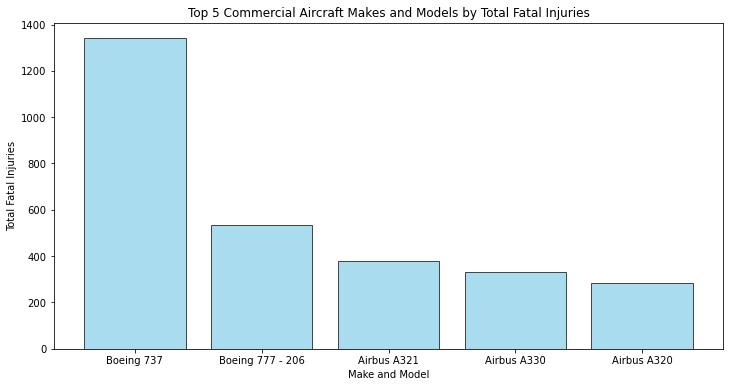

In [323]:
#Bar Chart Showing the Top 5 Make.Models by total Fatalities (All are commercial)
plt.figure(figsize=(12, 6))
plt.bar(make_model_names, fatal_injuries, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Top 5 Commercial Aircraft Makes and Models by Total Fatal Injuries')
plt.xticks(rotation=0, ha='center');

In [324]:
Commercial_Flights = df[df['Commercial'] == 'Yes']
Totaled_Commercial_Fatalities_by_Make = Commercial_Flights.groupby('Make')['Fatal'].sum()
Totaled_Commercial_Fatalities_by_Make.tail(5)
#This groups the sum of Fatal values equal to 1 based on the Make with a Commercial value of Yes 

Make
Airbus     22
Boeing    108
Name: Fatal, dtype: int32

In [325]:
Boeing_Occurances = 1215
Boeing_Fatality_Occurance = 108
Airbus_Occurances = 244
Airbus_Fatality_Occurances = 22

Boeing_Average_Fatality_Occurance = Boeing_Fatality_Occurance/Boeing_Occurances
Airbus_Average_Fatality_Occurance = Airbus_Fatality_Occurances/Airbus_Occurances

print(Boeing_Average_Fatality_Occurance)
print(Airbus_Average_Fatality_Occurance)

#we can see here that 8.8% of the time Boeing Accidents will have Fatalities
#we can see here that 9% of the time Airbus will have Fatalities

0.08888888888888889
0.09016393442622951


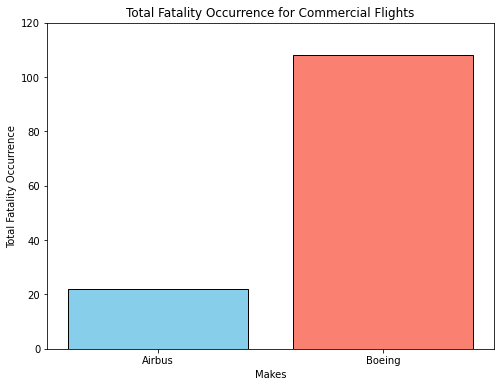

In [233]:
#Hard coding Airbus vs Boeing for the visual
makes = ["Airbus", "Boeing"]
totaled_fatalities_occurence = [22, 108]

plt.figure(figsize=(8, 6))
plt.bar(makes, fatalities, color=["skyblue", "salmon"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Total Fatality Occurrence")
plt.title("Total Fatality Occurrence for Commercial Flights")
plt.ylim(0, 120)
plt.yticks(range(0, 140, 20));

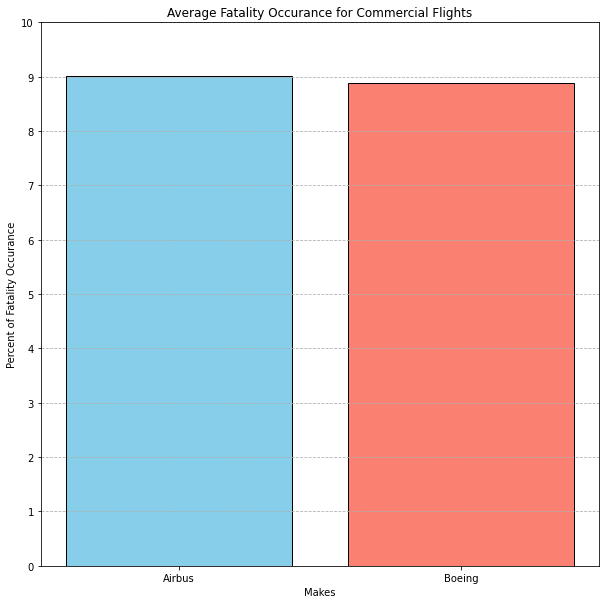

In [279]:
# We can see above that boeing has a lot more occurances of fatal accidents than Airbus. 
# But what is important is comparing the occurances of fatal accidents by the sample size. 
makes = ["Airbus", "Boeing"]
fatalities_occurance_averages = [Airbus_Average_Fatality_Occurance*100, Boeing_Average_Fatality_Occurance*100]

plt.figure(figsize=(10, 10))
plt.bar(makes, fatalities_occurance_averages, color=["skyblue", "salmon"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Percent of Fatality Occurance")
plt.title("Average Fatality Occurance for Commercial Flights")
plt.ylim(0, 10)
plt.yticks(range(0, 11, 1))
plt.grid(axis='y', linestyle='--');

In [235]:
#It is difficult to see, but Airbus at 9% and Boeing is at 8.8%  
#Therefore we can recommend Boeing as the Safest Commercial Maker adjusted for the limitations in the dataset.


In [341]:
Private_Flights_Minor_Damage = df[(df['Commercial'] == 'No') & (df['Aircraft.damage'] == 'Minor')]
Private_Flights_Minor_Damage_MostCommon = Private_Flights_Minor_Damage['Make'].value_counts().nlargest(20)
#This is giving us the top 20 most commonly occuring Makes by Minor Damage so we can get the average. 

In [342]:
Private_Flights_Minor_Damage_MostCommon
#As we can see below Cessna has 94 occurences, Piper has 46 occurences, Bombardier has 32 occurences

Cessna               94
Piper                46
Bombardier           32
Beech                30
Embraer              30
Mcdonnell douglas    26
Cirrus               14
Raytheon             10
Dehavilland           8
Diamond               7
Hawker                7
Atr                   6
Gulfstream            6
Air tractor           4
North american        4
Taylorcraft           3
Aviat                 3
Mooney                3
Flight design         3
Learjet               3
Name: Make, dtype: int64

In [348]:
#Cessna occurs 7088 
#Piper occurs 3950 
#Bombardier occurs 123
#We can find average occurance of minor damages by accidents
Cessna = (91/7088) * 100
Piper = (46/3950) * 100
Bombardier = (32/123) * 100


print(Cessna)
print(Piper)
print(Bombardier)



1.2838600451467268
1.1645569620253164
26.01626016260163


In [355]:
Private_Flights_Destroyed_Damage = df[(df['Commercial'] == 'No') & (df['Aircraft.damage'] == 'Destroyed')]
Private_Flights_Minor_Destroyed_MostCommon = Private_Flights_Destroyed_Damage['Make'].value_counts().nlargest(30)

In [356]:
Private_Flights_Minor_Destroyed_MostCommon

Cessna               655
Piper                442
Beech                237
Cirrus                83
Air tractor           59
Mooney                50
Grumman               39
Raytheon              19
Embraer               18
Dehavilland           16
North american        16
Socata                16
Hawker                14
Rockwell              14
Learjet               14
Champion              12
Aero commander        12
Ayres                 12
Aviat                 11
Bellanca              11
Mcdonnell douglas     11
Mitsubishi             9
Smith                  8
Diamond                8
Gulfstream             8
Pilatus                8
Maule                  8
Aeronca                7
Flight design          6
American               5
Name: Make, dtype: int64

In [357]:
#This is going to look up Mcdonnel douglas directly
Bombardier_Destroyed = df[(df['Make'] == 'Bombardier') & (df['Aircraft.damage'] == 'Destroyed') & (df['Commercial'] == 'No')]
Total_Bomb_Destroyed = len(Bombardier_Destroyed)
Total_Bomb_Destroyed

4

In [181]:
#This shows us that out of 7088 occurences Cessna planes were destroyed 646 times
#This shows us that out of 3950 occurences Piper planes were destroyed 430 times
#This shows us that out of 1408 occurences Beech planes were destroyed 237 times
#This shows us that out of 148 occurences Embraer planes were destroyed 18 times
#This shows us that out of 100 occurences Mcdonnel douglas planes were destroyed 0 times

#Tomorrow make a graph showing minor damage averages and make a graph for major damage averages(find averages too)

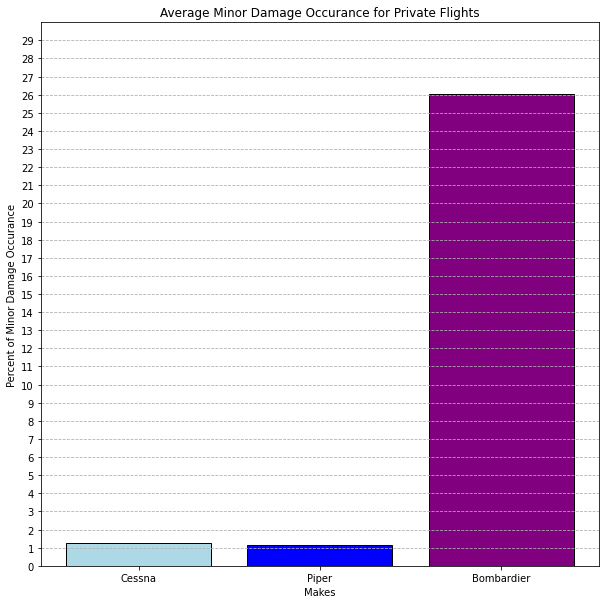

In [352]:
#Since Embraer and Mcdonnel have less than 200 entries in the data set lets only using Cessna, Piper, and Beech
makes = ["Cessna", "Piper", "Bombardier"]
minor_dmg_occurence_averages = [Cessna, Piper, Bombardier]

plt.figure(figsize=(10, 10))
plt.bar(makes, minor_dmg_occurence_averages, color=["lightblue", "blue", "purple"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Percent of Minor Damage Occurance")
plt.title("Average Minor Damage Occurance for Private Flights")
plt.ylim(0, 30)
plt.yticks(range(0, 30, 1))
plt.grid(axis='y', linestyle='--');


In [359]:
#now I need to calculate the averages of Destroyed data occurence
Cessna_Destroyed = (646/7088)*100
Piper_Destroyed = (430/3950)*100
Bombardier_Destroyed = (4/123)*100

print(Cessna_Destroyed)
print(Piper_Destroyed)
print(Bombardier_Destroyed)

#I notice that Cessna has the lowest average for destroyed damage types and the second highest 

9.113995485327314
10.886075949367088
3.2520325203252036


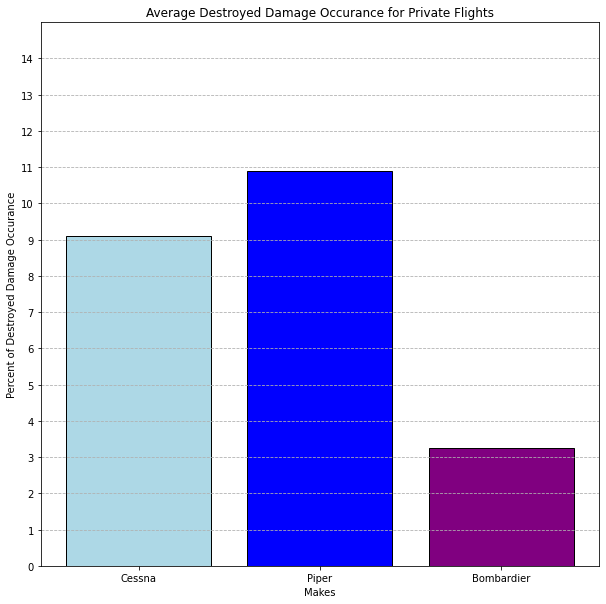

In [360]:
makes = ["Cessna", "Piper", "Bombardier"]
destroyed_dmg_occurence_averages = [Cessna_Destroyed, Piper_Destroyed, Bombardier_Destroyed]

plt.figure(figsize=(10, 10))
plt.bar(makes, destroyed_dmg_occurence_averages, color=["lightblue", "blue", "purple"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Percent of Destroyed Damage Occurance")
plt.title("Average Destroyed Damage Occurance for Private Flights")
plt.ylim(0, 15)
plt.yticks(range(0, 15, 1))
plt.grid(axis='y', linestyle='--');

In [185]:
#Since Bombardier has the lowest average of destroyed damage types and the highest percentage of minor damage types we can recommend it.
#Note the data provided is non substantial enough to recommend private makers based on fatalities

In [188]:
#Now we gotta compared the Avearges of Minor Damage and Destroyed for Commercial Flights
Commercial_Flights_Minor_Damage = df[(df['Commercial'] == 'Yes') & (df['Aircraft.damage'] == 'Minor')]
Commercial_Flights_Minor_Damage_Totaled = Commercial_Flights_Minor_Damage['Make'].value_counts().nlargest()
Commercial_Flights_Minor_Damage_Totaled

Boeing    39
Airbus     6
Name: Make, dtype: int64

In [189]:
#Boeing has 1215 occurences in the filtered data set and 39 of those had minor damages
#Airbus has 244 occurences in the filtered data set and 6 of those had minor damages
#Lets find the averages
Boeing_Minor = (39/1215)*100
Airbus_Minor = (6/244)*100

print(Boeing_Minor)
print(Airbus_Minor)

3.2098765432098766
2.459016393442623


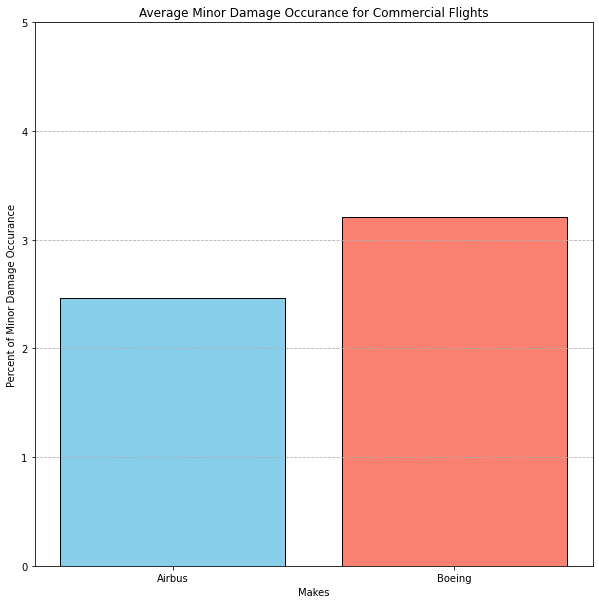

In [198]:
makes = ["Airbus", "Boeing"]
Commercial_MinorDmg_occurance_averages = [Airbus_Minor, Boeing_Minor]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_MinorDmg_occurance_averages, color=["skyblue", "salmon"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Percent of Minor Damage Occurance")
plt.title("Average Minor Damage Occurance for Commercial Flights")
plt.ylim(0, 5)
plt.yticks(range(0, 6, 1))
plt.grid(axis='y', linestyle='--');

In [191]:
Commercial_Flights_Destroyed_Damage = df[(df['Commercial'] == 'Yes') & (df['Aircraft.damage'] == 'Destroyed')]
Commercial_Flights_Destroyed_Damage_Totaled = Commercial_Flights_Destroyed_Damage['Make'].value_counts().nlargest()
Commercial_Flights_Destroyed_Damage_Totaled

Boeing    12
Airbus     1
Name: Make, dtype: int64

In [194]:
#As we can see airbus was only destroyed 1 time out of 244 while Boeing was destroyed 12 times out of 1215
Boeing_Destroyed = (12/1215) *100
Airbus_Destroyed = (1/244) *100

print(Boeing_Destroyed)
print(Airbus_Destroyed)

0.9876543209876543
0.4098360655737705


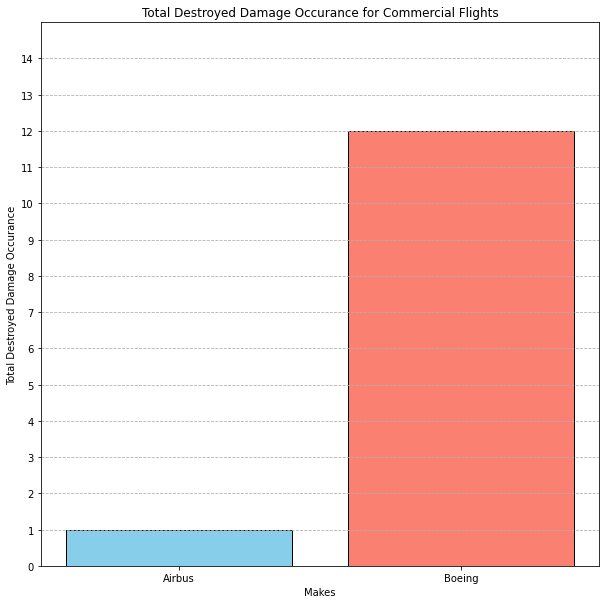

In [197]:
#Since the averages are so small I think our graph should show the number of occurences: Boeing = 12 and Airbus = 1
#The exporatory data can be left here with our description
#In the explanatory presentation we can explain what the 12 and the 1 mean

makes = ["Airbus", "Boeing"]
Commercial_DestroyedDmg_occurance_averages = [1, 12]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_DestroyedDmg_occurance_averages, color=["skyblue", "salmon"], edgecolor='black')
plt.xlabel("Makes")
plt.ylabel("Total Destroyed Damage Occurance")
plt.title("Total Destroyed Damage Occurance for Commercial Flights")
plt.ylim(0, 15)
plt.yticks(range(0, 15, 1))
plt.grid(axis='y', linestyle='--');

In [ ]:
#Our third recommendation is Airbus for commercial because the minor damage averages are so close and the airbus destroyed damage average is half that of boeing

